# PageRank algorithm
As a practical example, let's look at the PageRank algorithm, which is used by Google to rank the search results of a user query (http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf). It generates a number that quantifies the importance of search results in the context of the query the user has executed. This was designed by two Ph.D. students, Larry Page and Sergey Brin, at Stanford in the late 1990s, who also went on to start Google. The PageRank algorithm was named after Larry Page.


Importing necessary libraries

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Create a directed graph and add nodes and edges

In [ ]:
my_web = nx.DiGraph()
my_pages = range(1,6)  # Changed to 6 since you had 5 pages from 1 to 5
connections = [(1,3),(2,1),(2,3),(3,1),(3,2),(3,4),(4,5),(5,1),(5,4)]
my_web.add_nodes_from(my_pages)
my_web.add_edges_from(connections)

Plot the graph

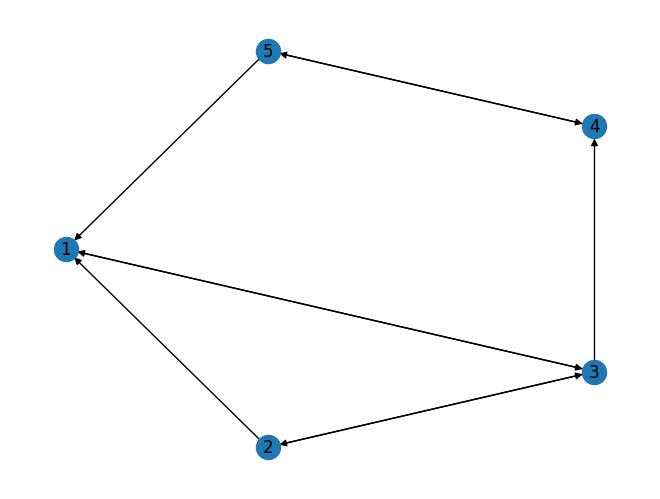

In [ ]:
pos = nx.shell_layout(my_web)
nx.draw(my_web, pos, arrows=True, with_labels=True)
plt.show()


Function to create the transition matrix

In [ ]:
def create_page_rank(a_graph):
    nodes_set = len(a_graph)
    M = nx.to_numpy_array(a_graph)

    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array([1.0 / count if count > 0 else 0.0 for count in outwards])

    G = np.asarray(np.multiply(M.T, prob_outwards))
    p = np.ones(nodes_set) / float(nodes_set)
    return G, p

Generate the transition matrix for the graph

In [ ]:
G, p = create_page_rank(my_web)
print(G)


[[0.         0.5        0.33333333 0.         0.5       ]
 [0.         0.         0.33333333 0.         0.        ]
 [1.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.5       ]
 [0.         0.         0.         1.         0.        ]]
